## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 7: Series de Tiempo**

Andrés C. Medina Sanhueza

Senior Data Scientist Engineer 

anmedinas@gmail.com

In [1]:
from matplotlib import pyplot as plt 
from scipy.stats import lognorm
import statsmodels.api as sm
import pandas_datareader.data as web 
import pandas as pd 
import seaborn as sns
import yfinance as yf
import numpy as np

sns.set_style("dark")

## ⛈️ Introducción

### Estructura de Datos

En estadística y econometría, existen estructuras de datos que se diferencian por cómo están organizadas las observaciones en relación al tiempo y a las unidades observadas.

<tr>
<td><img src="../figs/data_structure2.png" style="width: 1000px;"/> </td>
</tr>

* `Cross-Section Data` Datos recogidos en un solo punto en el tiempo para múltiples unidades (individuos, empresas, países, etc.). Estos datos, son los que se utilizan típicamente en análisis de regresión clásica. El uso típico de estos datos,  es comparar diferencias entre entidades en un momento determinado.

* `Time-Series Data` Datos recogidos a lo largo del tiempo para una sola unidad, por ejemplo el PIB trimestral de Chile desde 2000 hasta 2024. El uso típico de este tipo de datos es para analizar la evolución temporal y hacer predicciones.
  
*  `Panel Data` Combinación de sección cruzada y serie de tiempo: se observan múltiples unidades a lo largo de múltiples periodos de tiempo. El uso típico de estos datos es para estimar efectos causales y controlar por heterogeneidad individual no observable.

<tr>
<td><img src="../figs/data_structure3.png" style="width: 1000px;"/> </td>
</tr>


### Naturaleza de los datos de series de tiempo

La regresión lineal clásica vista en clases anteriores, se fundamenta en los supuestos de `Gauss-Markov`, los cuales garantizan que los estimadores obtenidos por mínimos cuadrados ordinarios (OLS) sean insesgados y eficientes dentro de la clase de estimadores lineales (`BLUE`). Estos supuestos incluyen *linealidad del modelo*, *exogeneidad*, *homoscedasticidad* y *ausencia de autocorrelación* entre los errores, además de *colinealidad imperfecta* entre regresores. Tales condiciones, sin embargo, fueron concebidas bajo un marco donde las observaciones son *independientes* y están distribuidas de manera idéntica, una condición que rara vez se cumple en el análisis de series de tiempo.

Las series temporales presentan una estructura *secuencial* inherente que introduce *correlación serial*, dinámicas de corto y largo plazo, y potenciales cambios en la varianza a lo largo del tiempo. Por tanto, aplicar un modelo de regresión clásico a una serie temporal suele implicar violaciones sistemáticas a varios de los supuestos de `Gauss-Markov`, especialmente a la `no autocorrelación` y a la `homoscedasticidad`. Estas violaciones comprometen tanto la eficiencia de los estimadores como la validez de la inferencia estadística derivada del modelo.

En este contexto, los modelos específicos para series temporales como los modelos autorregresivos integrados de media móvil (`ARIMA`) emergen como una generalización natural que acomoda explícitamente la dependencia temporal en los datos. En lugar de asumir independencia entre las observaciones, los modelos `ARIMA` describen la dinámica de la serie a través de sus propias observaciones pasadas y errores previos, incorporando componentes autorregresivos (`AR`), de diferenciación (`I`) y de medias móviles (`MA`). Esta formulación no sólo captura la estructura serial de los datos, sino que también reestablece condiciones bajo las cuales los estimadores pueden ser consistentes y eficientes, aunque por métodos distintos a OLS, como la máxima verosimilitud o métodos de estimación condicional.



## 🍁 Series de Tiempo

Una serie de tiempo puede definirse como un `proceso estocástico` que genera una `secuencia de variables aleatorias indexadas en el tiempo`. En este contexto, una serie de tiempo es un conjunto de observaciones aleatorias que se recolectan secuencialmente a lo largo de un intervalo temporal. Formalmente, un proceso estocástico $\{X_t\}$ se define como una colección de variables aleatorias indexadas en el tiempo $t$, donde $t$ es un conjunto discreto.  

Algunas propiedades de las series de tiempo:

1. **`Dependencia Temporal`**: Las observaciones en una serie de tiempo no son independientes entre sí. Existe una relación o dependencia entre las observaciones en diferentes momentos de tiempo. Esta dependencia puede ser de corta o larga duración y se analiza mediante `funciones de autocorrelación`.

2. **`Estacionariedad`**: Un proceso estocástico puede ser estacionario si sus propiedades estadísticas no cambian con el tiempo. Para una serie de tiempo, esto significa que la media, la varianza y la autocorrelación son constantes a lo largo del tiempo. Hay diferentes tipos de estacionariedad, como la estacionariedad fuerte y la estacionariedad débil.

3. **`Estructura de Ruido`**: Las series de tiempo suelen incluir un componente de ruido o error que es aleatorio y no predecible. Este ruido puede seguir una distribución específica (como la normal) y puede influir en la variabilidad de las observaciones.

4. **`Modelos Específicos`**: Existen varios modelos para describir y analizar procesos estocásticos en series de tiempo, como el modelo autoregresivo (AR), el modelo de media móvil (MA), y el modelo ARIMA mencionado anteriormente. Estos modelos permiten capturar la estructura de dependencia en los datos.

###  Componentes de una serie temporal

Las series de tiempo, suelen descomponerse en cuatro componentes.

* `Tendencia` ($T$): Componente de largo plazo que muestra la dirección general de los datos.

* `Estacionalidad` ($S$): Componente que muestra patrones regulares y predecibles que se repiten en intervalos fijos de tiempo.

* `Ciclo` ($C$): Componente que muestra fluctuaciones irregulares en los datos a largo plazo que no son estacionales.

* `Ruido` ($N$): Componente aleatorio que no se puede explicar por los otros componentes.

Esto se puede expresar como:

\begin{equation*}
Y_t = T_t + S_t + C_t + N_t
\end{equation*}


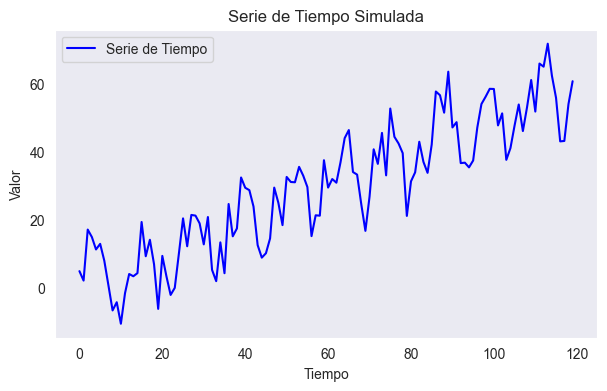

In [2]:
# Configuración de la semilla Aleatoria
np.random.seed(42)

# Parámetros de la Simulación
n = 120   # Número de observaciones (10 años mensuales)
t = np.arange(n)

# Componente de Tendencia (T)
trend = 0.5 * t

# Componente Estacional (senoidal) (S)
seasonal = 10 * np.sin(2 * np.pi * t / 12)

# Componente de Ciclo (aleatorio) (C)
cycle = 5 * np.random.randn(n)

# Componente de Ruido (N)
noise = np.random.normal(loc=0, scale=3, size=n)

# Generar la serie de tiempo
time_series = trend + seasonal + cycle + noise

# Crear un DataFrame
df = pd.DataFrame({
    'Time': t,
    'Value': time_series
})

# Visualizar la Serie de Tiempo
plt.figure(figsize = (7, 4))
plt.plot(df['Time'], df['Value'], label = 'Serie de Tiempo', color = 'blue')
plt.title('Serie de Tiempo Simulada')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

<Figure size 1400x1000 with 0 Axes>

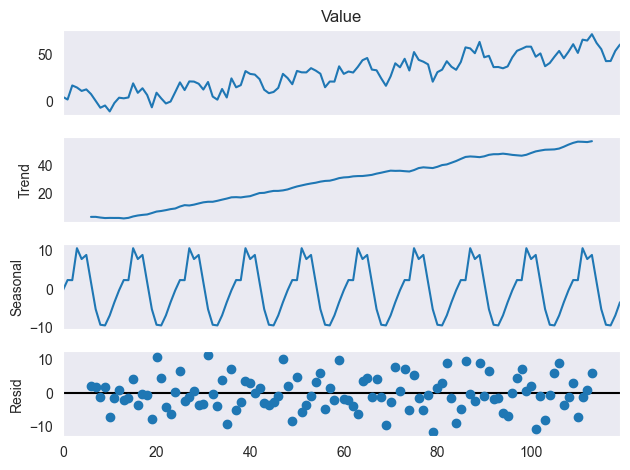

In [3]:
# Descomposición de la serie de tiempo
decomposition = sm.tsa.seasonal_decompose(df['Value'], model = 'additive', period = 12)

# Visualizar la descomposición
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()

## 🐙 Procesos Estacionarios 

### Ruido Blanco 

El ruido blanco en series de tiempo se refiere a una señal aleatoria que tiene una media constante y una varianza constante a lo largo del tiempo. Formalmente un proceso de ruido blanco, $X_t \sim \mathcal{N}(0, \sigma^2)$

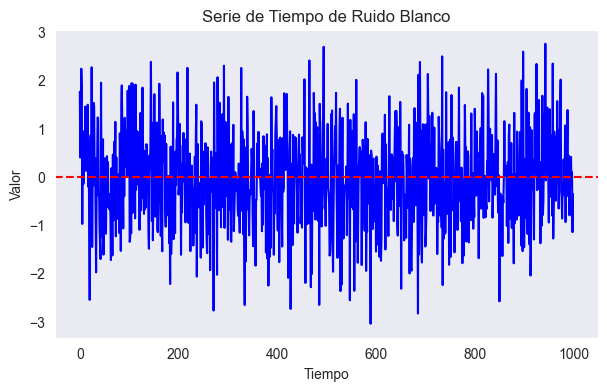

In [4]:
# Parámetros
np.random.seed(0)   # Para reproducibilidad
n = 1000            # Número de observaciones
mu = 0              # Media
sigma = 1            # Desviación estándar

# Generar ruido blanco
white_noise = np.random.normal(mu, sigma, n)

# Visualizar el ruido blanco
plt.figure(figsize=(7, 4))
plt.plot(white_noise, color='blue')
plt.title('Serie de Tiempo de Ruido Blanco')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.axhline(y=0, color='red', linestyle='--')  # Línea en la media
plt.show()

### Procesos AR

Un proceso autoregresivo de orden $p$ (a veces llamado proceso AR($p$)) , esta definido por la siguiente ecuación.


\begin{equation*}
X_{t} = \phi_{1}X_{t-1} + \phi_{2}X_{t-2} + \cdots + \phi_{p}X_{t-p} + \epsilon_t
\end{equation*}

Donde:
* $X_t$ es el valor actual de la serie en el tiempo $t$

* $\phi_1, \phi_2, \cdots, \phi_p$ son los coeficientes del modelo que describen la influencia de los valores pasados en $X_t$

* $p$ es el orden del modelo AR (el número de retardos incluidos en la ecuación)

* $\epsilon_t$ es ruido blanco, es decir,  $\epsilon_t \sim\mathcal{N}(0,\sigma^2)$

### Procesos MA

Un proceso de media móvil de orden $q$ a veces llamado (MA($q$)) está definido por la siguiente ecuación:


\begin{equation*}
X_{t} = \epsilon_t + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \cdots + \theta_{q}\epsilon_{t-q}  
\end{equation*}

Donde:

* $X_t$ es el valor actual de la serie en el tiempo $t$

* $\theta_1, \theta_2, \cdots, \theta_p$ son los coeficientes del modelo que describen la influencia de los valores pasados en $X_t$

* $q$ el número de errores rezagados incluidos en la ecuación

* $\epsilon_t$ es ruido blanco, es decir,  $\epsilon_t \sim\mathcal{N}(0,\sigma^2)$


### Procesos ARMA

Un proceso autoregresivo de media movil ARMA, de orden $p$ y $q$ esta definido por la siguiente ecuación:

\begin{equation*}
X_{t} = \phi_{1}X_{t-1} + \phi_{2}X_{t-2} + \cdots + \phi_{p}X_{t-p} + \epsilon_t + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \cdots + \theta_{q}\epsilon_{t-q}
\end{equation*}

Donde:

* $X_t$ es el valor actual de la serie en el tiempo $t$

* $\phi_1, \phi_2, \cdots, \phi_p$ son los coeficientes del componente AR

* $\theta_1, \theta_2, \cdots, \theta_p$ son los coeficientes del componente MA

* $p$ es el orden de la componente AR

* $q$ es el orden de la componente MA

* $\epsilon_t$ es ruido blanco, es decir,  $\epsilon_t \sim\mathcal{N}(0,\sigma^2)$

Una forma más compacta de escribir este tipo de modelos, es de la siguiente forma:

\begin{equation*}
X_{t} = \sum_{i=1}^{p}\phi_{i}X_{t-i} + \epsilon_{t}\sum_{j=1}^{q}\theta_{j}\epsilon_{t-j}
\end{equation*}

Sin embargo, la mayoria de implementaciones computacionales de los procesos ARMA, tienen la siguiente estructura:

\begin{equation*}
X_{t} = \phi_{1}X_{t-1} + \phi_{2}X_{t-2} + \cdots + \phi_{p}X_{t-p} + \epsilon_t + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \cdots + \theta_{q}\epsilon_{t-q}
\end{equation*}

Consideremos el operador de rezagos $L$ de la siguiente manera:

\begin{equation*}
L^k X_{t} = X_{t-k}
\end{equation*}

Esto significa que el operador retrasa la serie en un $k$ periodos, ejemplo $LX_t = X_{t-1}$, $L^2X_t = X_{t-2}$ etc.

Si escribimos el proceso AR($p$) en funcion de los rezagos, tendriamos la siguiente expresion.

\begin{equation*}
\begin{aligned}
X_{t} &= \phi_1 LX_{t} + \phi_2 L^2X_{t} + \cdots  + \phi_p L^p X_{t} + \epsilon_t \\
\epsilon_t &= \phi_1 LX_{t} + \phi_2 L^2X_{t} + \cdots  + \phi_p L^p X_{t} - X_t \\
&= (1-\phi_1 L-\phi_2 L^2-\cdots - \phi_p L^p)X_{t}
\end{aligned}
\end{equation*}

A la ultima expresion, se conoce como el `polinomio autoregresivo`, y se definde como:

\begin{equation*}
\Phi(L) = (1-\phi_1 L-\phi_2 L^2-\cdots - \phi_p L^p)
\end{equation*}

Por tanto, el proceso AR($p$) se escribe como

\begin{equation*}
\Phi(L)X_t = \epsilon_t
\end{equation*}

Por otro lado, en el caso de del proceso MA($q$)

\begin{equation*}
\begin{aligned}
X_{t} &= \epsilon_t + \theta_{1}L\epsilon_{t} + \theta_{2}L^2 \epsilon_{t} + \cdots + \theta_{q}L^q\epsilon_{t} \\
&= (1+\theta_1 L + \theta_2 L^2 + \cdots + \theta_q L^q)\epsilon_t
\end{aligned}
\end{equation*}

A la ultima expresion, se conoce como el `olinomio de medias moviles` y define como:

\begin{equation*}
\Theta(L) = (1+\theta_1 L + \theta_2 L^2 + \cdots + \theta_q L^q)
\end{equation*}

Por tanto, el proceso de MA($q$) se escribe como:

\begin{equation*}
\Theta(L)\epsilon_t = X_{t}
\end{equation*}

Si combino ambas expresiones para representar al modelo ARMA($p$, $q$), la expresion es de la siguiente forma:

\begin{equation*}
\Phi(L)X_t = \Theta(L)\epsilon_t
\end{equation*}

Esto, significa que el modelo es de la siguiente forma:

\begin{equation*}
(1-\phi_1 L-\phi_2 L^2-\cdots - \phi_p L^p)X_{t} = (1+\theta_1 L + \theta_2 L^2 + \cdots + \theta_q L^q)\epsilon_t
\end{equation*}

La expresion anterior, es la expresion que se encuentra implementada en el modulo `statsmodels.tsa.arima_process` de python.

**Ejercicio 🖍️** 

Simule los siguientes procesos en python:
1. **AR(2)**: $X_{t} = \phi_{1}X_{t-1} + \phi_{2}X_{t-2} + \epsilon_t$
2. **MA(2)**: $X_{t} = \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} +\epsilon_t$
3. **ARMA(2,2):** $X_{t} = \phi_{1}X_{t-1} + \phi_{2}X_{t-2} + \epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2}$

Donde $\phi = \left[0.75, -0.25 \right]$ y  $\theta = \left[0.65, 0.35 \right]$

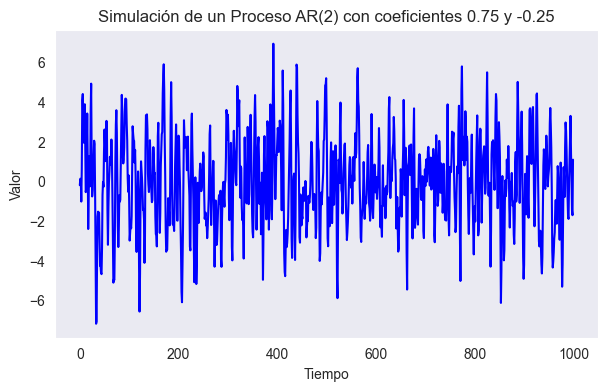

In [5]:
# Simula Proceso AR(2)
from statsmodels.tsa.arima_process import ArmaProcess

# Semilla Aleatoria
np.random.seed(12345)

# Cantidad de muestras a simular
nsample = 1000

# Definir Parametros para proceso AR
arparams = np.array([.75, -.25])
maparams = np.array([1])

ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

# Crear el proceso AR(2)
AR2_process = ArmaProcess(ar, ma)

# Generar muestra de tamaño 1000
simulated_AR2 = AR2_process.generate_sample(nsample=1000)

# Visualización de la serie AR(2)
plt.figure(figsize = (7, 4))
plt.plot(simulated_AR2, color='blue')
plt.title('Simulación de un Proceso AR(2) con coeficientes 0.75 y -0.25')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

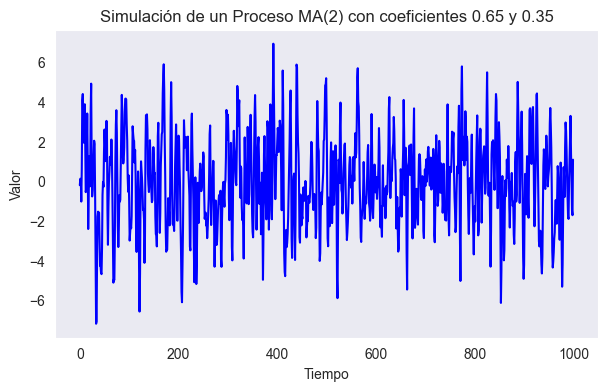

In [6]:
# Simulacion de Procesos MA(2)

from statsmodels.tsa.arima_process import ArmaProcess

# Semilla Aleatoria
np.random.seed(12345)

# Cantidad de muestras a simular
nsample = 1000

# Definir Parametros para proceso AR
arparams = np.array([1])
maparams = np.array([0.65, 0.35])

ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag

# Crear el proceso AR(2)
MA2_process = ArmaProcess(ar, ma)

# Generar muestra de tamaño 1000
simulated_MA2 = MA2_process.generate_sample(nsample=1000)

# Visualización de la serie MA(2)
plt.figure(figsize = (7, 4))
plt.plot(simulated_AR2, color='blue')
plt.title('Simulación de un Proceso MA(2) con coeficientes 0.65 y 0.35')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

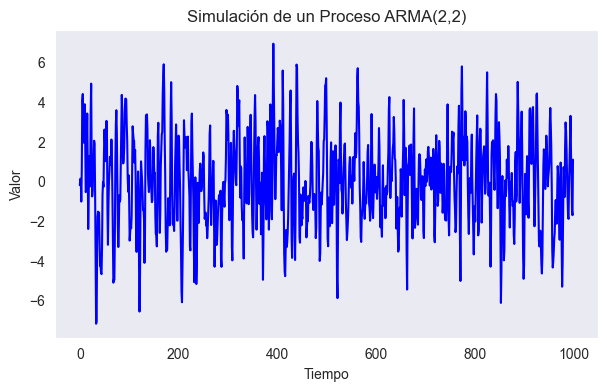

In [7]:
# Simulacion de Procesos ARMA(2,2)

from statsmodels.tsa.arima_process import ArmaProcess

# Semilla Aleatoria
np.random.seed(12345)

# Cantidad de muestras a simular
nsample = 1000

# Definir Parametros para proceso AR
arparams = np.array([.75, -.25])
maparams = np.array([0.65, 0.35])

ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag

# Crear el proceso AR(2)
ARMA2_process = ArmaProcess(ar, ma)

# Generar muestra de tamaño 1000
simulated_ARMA2 = ARMA2_process.generate_sample(nsample=1000)

# Visualización de la serie ARMA(2,2 )
plt.figure(figsize = (7, 4))
plt.plot(simulated_AR2, color='blue')
plt.title('Simulación de un Proceso ARMA(2,2)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

### Procesos ARIMA

El modelo ARIMA($p$,$d$, $q$) es una extension del modelo ARMA($p$,$q$) que incorpora una parte de integración para manejar series no estacionarias. El formalismo del proceso, combina tres componentes.

1. **AR**($p$) Componente autorregresivo de orden
$p$, que depende de los valores pasados de la serie.

2. **I**($d$) Componente de integración de orden
$d$, que representa el número de diferencias aplicadas para hacer la serie estacionaria.

3. **MA**($q$) Componente de media móvil de orden
$q$, que depende de los errores pasados.

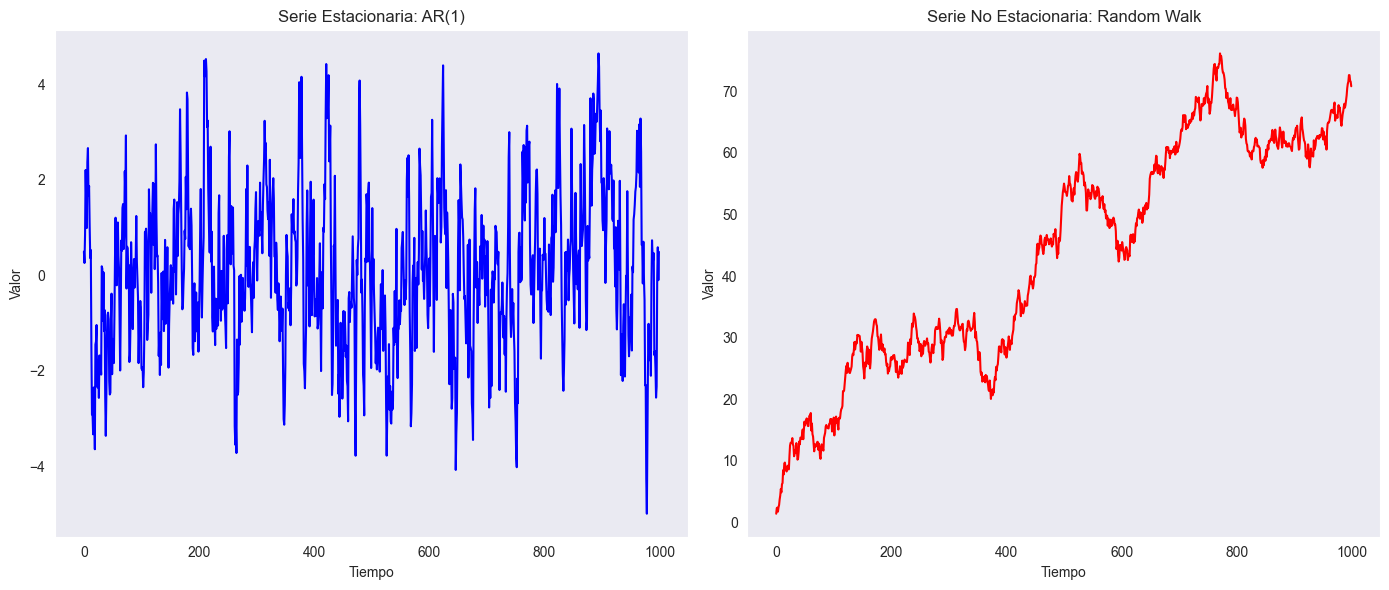

In [8]:
# Ejemplo de una serie estacionaria y una no estacionaria

# Serie estacionaria: Proceso AR(1)
np.random.seed(42)
n = 1000

ar1 = np.array([1, -0.8])  # AR(1) coeficiente para una serie estacionaria
ma0 = np.array([1])        # No hay componente MA
stationary_process = ArmaProcess(ar1, ma0).generate_sample(nsample=n)

# Serie no estacionaria: Proceso con tendencia (random walk)
non_stationary_process = np.cumsum(np.random.normal(size=n))  # Random walk no estacionario

# Visualización de ambas series
plt.figure(figsize=(14, 6))

# Subplot 1: Serie estacionaria
plt.subplot(1, 2, 1)
plt.plot(stationary_process, color='blue')
plt.title('Serie Estacionaria: AR(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

# Subplot 2: Serie no estacionaria
plt.subplot(1, 2, 2)
plt.plot(non_stationary_process, color='red')
plt.title('Serie No Estacionaria: Random Walk')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

plt.tight_layout()
plt.show()

Matematicamente, esto se ve de la siguiente forma:

Si la serie $X_t$ `no es estacionaria` se aplica una diferenciación $d$ veces para hacerla estacionaria. La diferencia de primer orden se define como:

\begin{equation*}
Y_t = X_t - X_{t-1}
\end{equation*}

Para $d$ diferencias

\begin{equation*}
Y_t = \Delta^{d}X_t = (1-L)^{d}X_t
\end{equation*}

Donde $L$ es el operador de rezagos y $d$ es el numero de diferencias.

La componente AR($p$) del modelo es $\Phi(L)X_t = \epsilon_t$ y la componente MA($q$) es $\Theta(L)\epsilon_t = X_{t}$, luego, el modelo ARIMA($p$,$d$,$q$) se define en forma mas compacta como:

\begin{equation*}
\Phi(L)(1-L)^d X_t = \Theta(L)\epsilon_t
\end{equation*}

/var/folders/nt/8nscwt3x5l1c4sllg6mw2zh80000gn/T/ipykernel_84003/1977613081.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-01-01", progress = False)


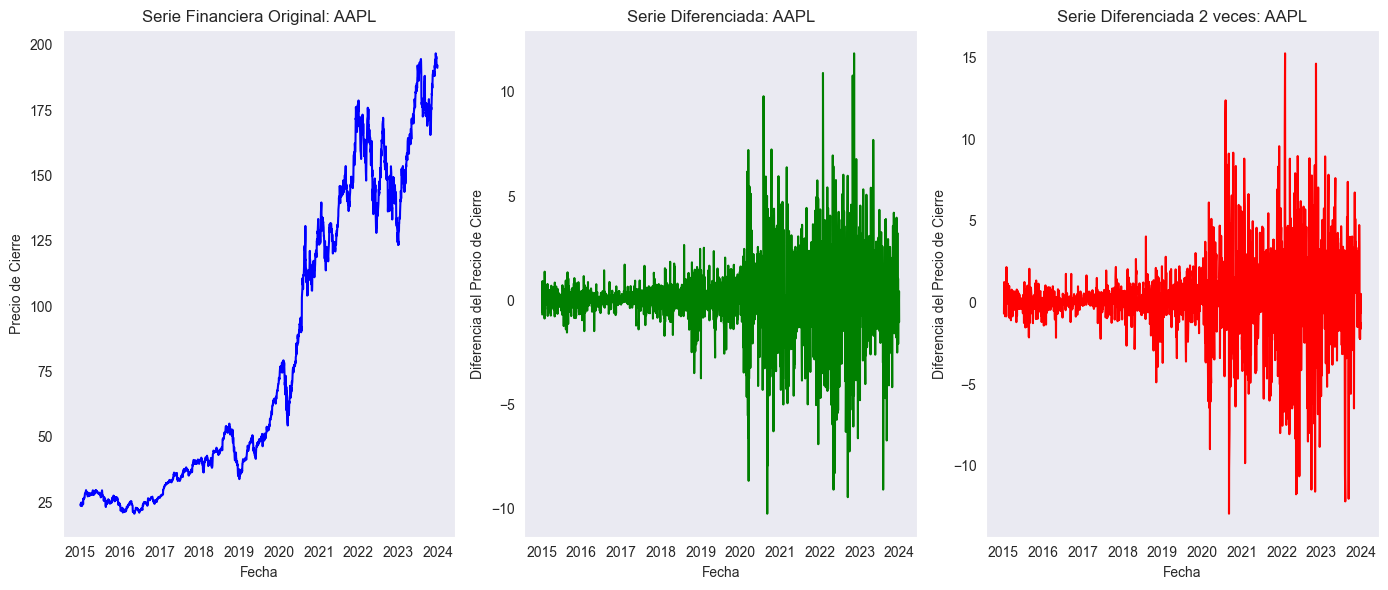

In [9]:
# Descarga la serie de APPLE con precios de cierre
ticker = 'AAPL'
data = yf.download(ticker, start="2015-01-01", end="2024-01-01", progress = False)

# Extraer la columna 'Close' (precio de cierre)
close_prices = data['Close']

# Diferenciar la serie para hacerla estacionaria
diff_close_prices = close_prices.diff().dropna()  # Diferencias de primer orden
diff_close_prices2 = close_prices.diff(2).dropna()  # Diferencias de primer orden

# Visualización de la serie original y la serie diferenciada
plt.figure(figsize = (14, 6))

# Subplot 1: Serie financiera original
plt.subplot(1, 3, 1)
plt.plot(close_prices, color='blue')
plt.title(f'Serie Financiera Original: {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')

# Subplot 2: Serie diferenciada
plt.subplot(1, 3, 2)
plt.plot(diff_close_prices, color = 'green')
plt.title(f'Serie Diferenciada: {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Diferencia del Precio de Cierre')

# Subplot 3: Serie 2 veces diferenciada
plt.subplot(1, 3, 3)
plt.plot(diff_close_prices2, color = 'red')
plt.title(f'Serie Diferenciada 2 veces: {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Diferencia del Precio de Cierre')

plt.tight_layout()
plt.show()

## 🐠 Test Estadísticos

#### **¿ Como saber si la serie es estacionaria ?**

Una serie es estacionaria si sus propiedades estadísticas como la media, varianza y autocorrelación permanecen constantes a lo largo del tiempo. Para verificar esta propiedad, existen diversas formas de contrastarlo, desde test estadísticos hasta pruebas visuales.

* `Análisis Visual`:
  * **Gráfico de la serie**: Inspecciona si la serie presenta una tendencia o una varianza cambiante o volátil a lo largo del tiempo.

  * **Gráfico de Autocorrelación (ACF)**: Si los coeficientes de autocorrelacion caen lentamente (decaimiento exponencial) significa que la serie es estacionaria, de lo contrario, si mantiene decaimiento lento, pero persiste en el tiempo, es porque la serie presenta una componente de tendencia, por tanto no es estacionaria.

      ```python
      from statsmodels.graphics.tsaplots import plot_acf
      from statsmodels.graphics.tsaplots import plot_pacf
      ```

* `Test Estadísticos`:
  * **Dickey Fuller (ADF)**: Evalúa si la serie tiene raíz unitaria (indicando no estacionariedad). La hipótesis nula es que la serie no es estacionaria. Un $p$-value bajo (generalmente < 0.05), sugiere que podemos rechazar la hipótesis nula y que la serie es estacionaria.

      ```python
      from statsmodels.tsa.stattools import adfuller
      ```

  * **KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**: A diferencia del ADF, aqui la hipótesis nula es que la serie es estacionaria. Si el $p$-value es bajo, indica que la serie no es estacionaria.  

    ```python
      from statsmodels.tsa.stattools import kpss
      ```

* `Transformaciones comunes`:
  * **Diferenciación**: Restar los valores consecutivos de la serie para eliminar la tendencia (diferenciación de primer orden) o tendencias más complejas (diferenciacion de segundo orden)

  * **Transformaciones Logaritmicas**: Pueden estabilizar la varianza
  
  * **Descomposición de la Serie**: Separar la serie en componentes de tendencia, estacionalidad o ruido.

In [10]:
# Funcion que genera ACF y PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(serie, lags = None):

  # Configuro la figura a mostrar como subplots
  fig, axes = plt.subplots(1, 2, figsize=(11,5))

  # Grafico ACF
  plot_acf(serie, lags = lags, ax = axes[0], title = '(ACF)', zero = True)

  # Grafico PACF
  plot_pacf(serie, lags = lags, ax = axes[1], title = '(PACF)', zero = True)

  # Visualiza
  plt.tight_layout()
  plt.show()

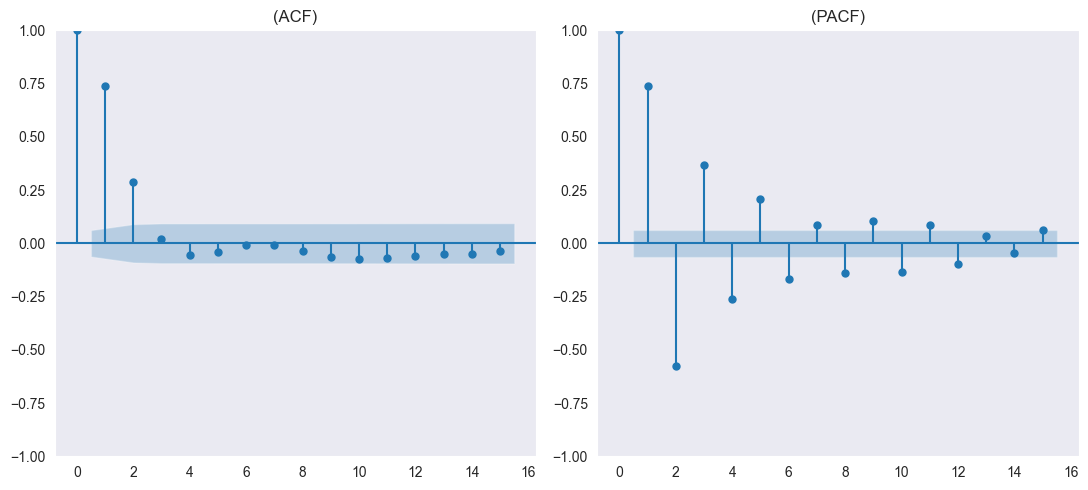

In [11]:
# ACF y PACF Modelo AR(2) Simulado
plot_acf_pacf(simulated_AR2, lags = 15)

In [12]:
# Funcion que chequea si la serie es estacionaria
from statsmodels.tsa.stattools import adfuller

def valida_estacionariedad(serie, nivel_significancia = 0.05):

  # Aplica Test
  df_series = adfuller(serie)

  # Extrae Resultados
  estadistico_adf = df_series[0] # Estadistico del Test
  p_value = df_series[1]         # P-Valor
  lags_num = df_series[2]        # Rezagos
  o_obs = df_series[3]           # Num. Observaciones
  val_criticos = df_series[4]    # Valores Criticos

  # Determina si la serie es estacionaria
  es_estacionaria = p_value < nivel_significancia

  # Genera resumen de resultados
  resultado = {
      'Estadistico ADF': estadistico_adf,
      'P-Valor': p_value,
      'Rezagos': lags_num,
      'Num. Observaciones': o_obs,
      'valores criticos': val_criticos,
      'Es Estacionaria': es_estacionaria
  }

  # Muestra resultados
  print(f"Estadistico ADF: {estadistico_adf}")
  print(f"P-Valor: {p_value}")
  print(f"Numero de lags utilizados: {lags_num}")
  print(f"Numero de  Observaciones: {o_obs}")
  print(f"Valores Criticos: {val_criticos}")
  for clave, valor in val_criticos.items():
    print(f"  {clave}: {valor}")
  if es_estacionaria:
        print(f"La serie es estacionaria: {es_estacionaria}")
  else:
        print(f"La serie no es estacionaria: {es_estacionaria}")

  return resultado

In [13]:
# Test estacionariedad Modelo AR(2) Simulado
valida_estacionariedad(simulated_AR2)

Estadistico ADF: -7.573280268218011
P-Valor: 2.8043786701281984e-11
Numero de lags utilizados: 22
Numero de  Observaciones: 977
Valores Criticos: {'1%': np.float64(-3.43706091543889), '5%': np.float64(-2.8645028204932483), '10%': np.float64(-2.568347558984588)}
  1%: -3.43706091543889
  5%: -2.8645028204932483
  10%: -2.568347558984588
La serie es estacionaria: True


{'Estadistico ADF': np.float64(-7.573280268218011),
 'P-Valor': np.float64(2.8043786701281984e-11),
 'Rezagos': 22,
 'Num. Observaciones': 977,
 'valores criticos': {'1%': np.float64(-3.43706091543889),
  '5%': np.float64(-2.8645028204932483),
  '10%': np.float64(-2.568347558984588)},
 'Es Estacionaria': np.True_}

In [14]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(simulated_AR2, lags = 2 )
model_fit = model.fit()

# Resultados del modelo
print(model_fit.summary())

# Obtener los coeficientes estimados
phi1_est = model_fit.params[1]  # Coeficiente AR(1)
phi2_est = model_fit.params[2]  # Coeficiente AR(2)

print(f"Coeficiente estimado AR(1): {phi1_est}")
print(f"Coeficiente estimado AR(2): {phi2_est}")

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(2)   Log Likelihood               -1624.352
Method:               Conditional MLE   S.D. of innovations              1.232
Date:                Thu, 26 Jun 2025   AIC                           3256.703
Time:                        22:48:15   BIC                           3276.326
Sample:                             2   HQIC                          3264.162
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.039     -0.110      0.912      -0.081       0.072
y.L1           1.1694      0.026     45.208      0.000       1.119       1.220
y.L2          -0.5786      0.026    -22.363      0.0

##  🪲 Metodología Box-Jenkins

La metodología Box-Jenkins es un enfoque sistemático y ampliamente utilizado para modelar y pronosticar series de tiempo mediante modelos ARIMA (AutoRegressive Integrated Moving Average). Fue desarrollada por George Box y Gwilym Jenkins en la década de 1970 y ha sido un pilar en análisis estadístico de datos temporales.

  *La idea central es encontrar un modelo ARIMA que explique la estructura temporal de una serie de tiempo y que luego pueda ser usado para hacer pronósticos* 

<tr>
<center>
<td><img src="box_jenkins.png" style="width: 600px;"/> </td>
</center>
</tr>



## 🐌 API REST desde Banco Central 

Además de extraer informacion desde `yfinance`y `FRED`, podemos descargar datos desde la base de datos estadísticos del Banco Central de Chile. Esto, se hace mediante acceso a una API REST disponibilizada en el siguiente link: 
[banco central](https://si3.bcentral.cl/Siete/es/Siete/API?respuesta=). En esta pagina, aparece un mini tutorial de como crear un usuario y como conectarse a la base de datos. Para ello, debe instalar el siguiente módulo.

```bash
pip install bcchapi
```

#### Conexión

In [15]:
import bcchapi
from config import * # contiene user y pass

conn = bcchapi.Siete(USER, PASS)

In [16]:
# busco series financieras solo de chile
catalogo = conn.buscar("Chile")

In [17]:
# verifico cuales son las frecuencias que aparecen para las series
catalogo['frequencyCode'].value_counts()

frequencyCode
MONTHLY      618
QUARTERLY    558
DAILY        446
ANNUAL       282
Name: count, dtype: int64

In [18]:
# muestro las series que estan en frecuenia mensual 
catalogo[catalogo['frequencyCode'] == 'MONTHLY']

,seriesId,frequencyCode,spanishTitle,englishTitle,firstObservation,lastObservation,updatedAt,createdAt
1004,F061.2B12.FLU.S.USD.Z.M,MONTHLY,"Inversión directa en Chile, 1996-2011 (BP)","Direct investment in Chile, 1996-2011 (BP)",1996-03-01,2012-01-01,2015-01-09,2015-01-09
1005,F061.2B122.FLU.S.USD.Z.M,MONTHLY,Utilidades reinvertidas de inversión directa e...,Reinvested earnings from direct investment in ...,1996-03-01,2012-01-01,2015-01-09,2015-01-09
1006,F061.2B123.FLU.S.USD.Z.M,MONTHLY,"Otro capital de inversión directa en Chile, 19...","Other capital of direct investment in Chile, 1...",1996-03-01,2012-01-01,2015-01-09,2015-01-09
1007,F061.2B22.FLU.S.USD.Z.M,MONTHLY,"Inversión de cartera en Chile, 1996-2011 (BP)","Direct investment in Chile, 1996-2011 (BP)",1996-03-01,2012-01-01,2015-01-09,2015-01-09
1008,F062.A5.STO.PF.USD.M,MONTHLY,Reservas internacionales del Banco Central de ...,International reserves of the Central Bank of ...,1982-01-01,2025-05-01,2025-06-23,2025-06-23
...,...,...,...,...,...,...,...,...
1617,F035.NFRVITE.FLU.Z.N.Z.Z.Z.Z.14.0.M,MONTHLY,Inter-regional | venta regional (cantidad de f...,Inter-regional | regional sale (number of invo...,2018-01-01,2025-05-01,2025-06-23,2025-06-23
1618,F035.NFRVITE.FLU.Z.N.Z.Z.Z.Z.15.0.M,MONTHLY,Inter-regional | venta regional (cantidad de f...,Inter-regional | regional sale (number of invo...,2018-01-01,2025-05-01,2025-06-23,2025-06-23
1619,F035.NFRVITE.FLU.Z.N.Z.Z.Z.Z.16.0.M,MONTHLY,Inter-regional | venta regional (cantidad de f...,Inter-regional | regional sale (number of invo...,2018-01-01,2025-05-01,2025-06-23,2025-06-23
1620,F019.EPU.IND.91.M,MONTHLY,Índice de Incertidumbre de Política Económica ...,Economic Policy Uncertainty Index - Chile,1993-01-01,2025-04-01,2025-06-10,2025-06-10


#### Descarga serie del desempleo

In [19]:
# help de cuadro (funcion para descargar datos)
help(conn.cuadro)

Help on method cuadro in module bcchapi.siete:

cuadro(series: list, desde: str = '', hasta: str = '', *, nombres: list = None, frecuencia=None, observado=None, variacion: int = None, detener_invalidas: bool = True, resample_kw: dict = None, aggregate_kw: dict = None) -> pandas.core.frame.DataFrame method of bcchapi.siete.Siete instance
    Constructs a table with requested series.
    
    This is a spanish implementation of the method :meth:`bcchapi.Stat.table`.
    All parameters are passed without modification.



In [20]:
# Descarga serie de desempleo
umpl_df = conn.cuadro(
    series = ['F049.DES.TAS.INE9.10.M'], # codigo relacionado a la tasa de desempleo
    nombres = ["desempleo"],
    desde = "2010-01-01",
    hasta = "2024-12-01",
    frecuencia = "M",
    observado = "mean")

/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Finance/env_arima/lib/python3.10/site-packages/bcchapi/siete.py:132: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df.resample(frequency, **resample_kw)


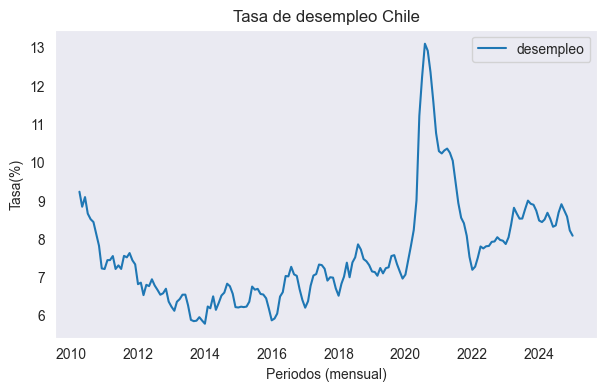

In [21]:
# Plot series de desempleo

plt.figure(figsize=(7,4))
sns.lineplot(data = umpl_df)
plt.xlabel('Periodos (mensual)')
plt.ylabel('Tasa(%)')
plt.title('Tasa de desempleo Chile')
plt.show()


### Descarga serie Imacec No Minero

In [22]:
imacec_df = conn.cuadro(
    series = ['F032.IMC.IND.Z.Z.EP18.N03.Z.0.M'], # codigo relacionado al imacec no minero
    nombres = ["imacec"],
    desde = "2010-01-01",
    hasta = "2024-12-01",
    frecuencia = "M",
    observado = "mean")

/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Finance/env_arima/lib/python3.10/site-packages/bcchapi/siete.py:132: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df.resample(frequency, **resample_kw)


In [23]:
imacec_df.head()

,imacec
2010-01-31,70.689670
2010-02-28,67.662023
2010-03-31,73.341273
2010-04-30,75.581962
2010-05-31,75.307518


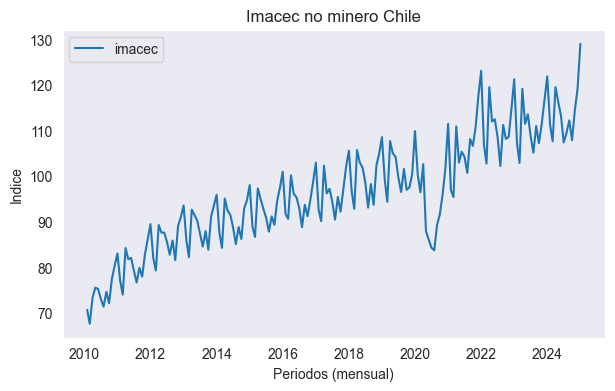

In [24]:
# serie imacec no minero
plt.figure(figsize=(7,4))
sns.lineplot(data = imacec_df)
plt.xlabel('Periodos (mensual)')
plt.ylabel('Indice')
plt.title('Imacec no minero Chile')
plt.show()

In [25]:
# convierte la serie a variacion anual
imacec_df['var_anual'] = imacec_df['imacec'].pct_change(periods = 12) * 100

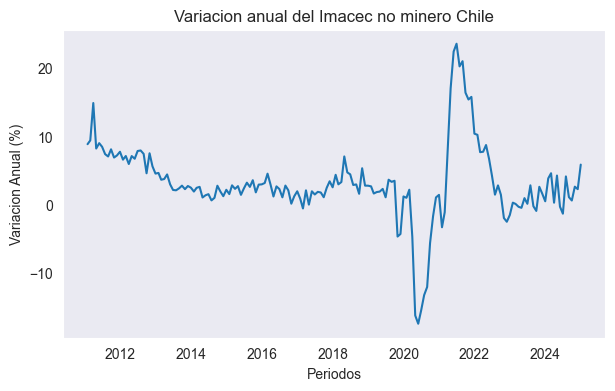

In [26]:
plt.figure(figsize = (7,4))
sns.lineplot(data = imacec_df['var_anual'])
plt.xlabel('Periodos')
plt.ylabel('Variacion Anual (%)')
plt.title('Variacion anual del Imacec no minero Chile')
plt.show()

### Descarga serie Tasa Politica Monetaria

In [27]:
tpm_df = conn.cuadro(
    series = ['F022.TPM.TIN.D001.NO.Z.D'], # codigo relacionado al tpm 
    nombres = ["tpm"],
    desde = "2020-01-01",
    hasta = "2025-06-25",
    frecuencia = "M",
    observado = "mean")

/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Finance/env_arima/lib/python3.10/site-packages/bcchapi/siete.py:132: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df.resample(frequency, **resample_kw)


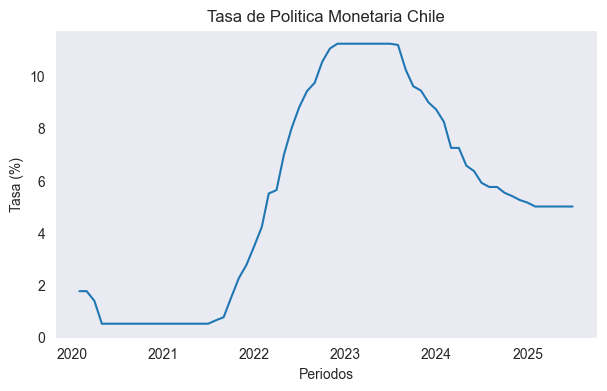

In [28]:
plt.figure(figsize = (7,4))
sns.lineplot(data = tpm_df['tpm'])
plt.xlabel('Periodos')
plt.ylabel('Tasa (%)')
plt.title('Tasa de Politica Monetaria Chile')
plt.show()

### Descarga serie IPC

In [29]:
ipc_df = conn.cuadro(
    series = ['G073.IPC.VAR.2023.M'], # codigo relacionado al ipc 
    nombres = ["ipc"],
    desde = "2010-01-01",
    hasta = "2025-06-25",
    frecuencia = "M",
    observado = "mean")

/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Finance/env_arima/lib/python3.10/site-packages/bcchapi/siete.py:132: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df.resample(frequency, **resample_kw)


¿ Qué significa el código de la serie? 

* `G073` : Identificador interno de la serie dentro del sistema.
* `IPC` : Se refiere al Índice de Precios al Consumidor.
* `VAR` : Indica que la serie corresponde a la variación del IPC.
* `2023` : Señala la base del índice o período de referencia 2023.
* `M` :Indica que es una serie de frecuencia mensual.


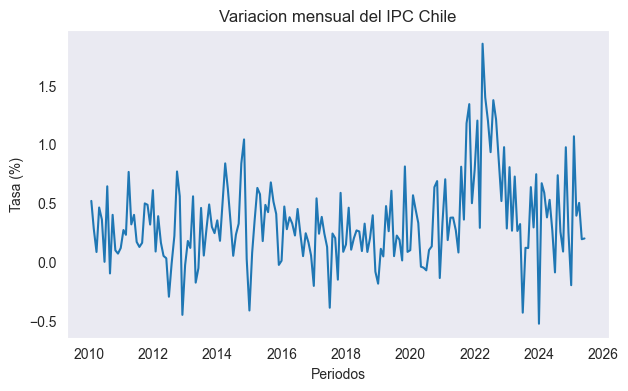

In [30]:
plt.figure(figsize = (7,4))
sns.lineplot(data = ipc_df['ipc'])
plt.xlabel('Periodos')
plt.ylabel('Tasa (%)')
plt.title('Variacion mensual del IPC Chile')
plt.show()

### Descarga serie IPC SAE

In [31]:
ipc_sae_df = conn.cuadro(
    series = ['F074.IPCSAE.IND.Z.EP23.Z.M'], # codigo relacionado al ipc 
    nombres = ["ipc_sae"],
    desde = "2009-12-01",
    hasta = "2024-12-01",
    frecuencia = "M",
    observado = "mean")

/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Finance/env_arima/lib/python3.10/site-packages/bcchapi/siete.py:132: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df.resample(frequency, **resample_kw)


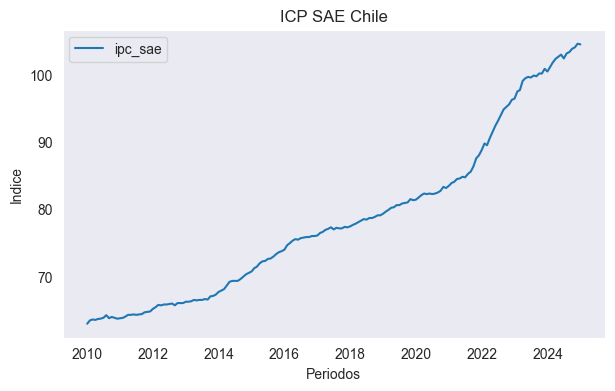

In [32]:
plt.figure(figsize = (7,4))
sns.lineplot(data = ipc_sae_df)
plt.xlabel('Periodos')
plt.ylabel('Indice')
plt.title('ICP SAE Chile')
plt.show()

In [33]:
# convierte la serie a variacion anual
ipc_sae_df['var_anual'] = ipc_sae_df['ipc_sae'].pct_change(periods = 12) * 100

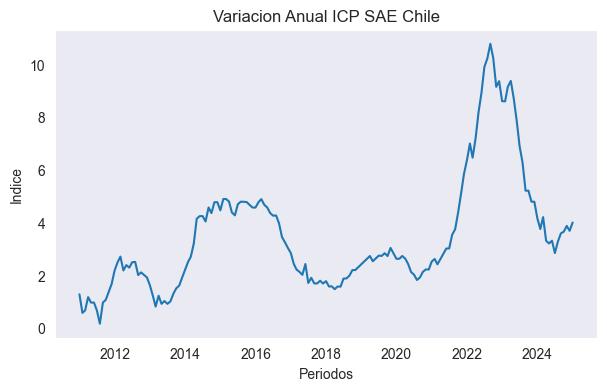

In [34]:
plt.figure(figsize = (7,4))
sns.lineplot(data = ipc_sae_df['var_anual'])
plt.xlabel('Periodos')
plt.ylabel('Indice')
plt.title('Variacion Anual ICP SAE Chile')
plt.show()

### Estimación de un modelo para el IPC  

#### ¿Es estacionaria la serie ICP (variacion mensual)? 

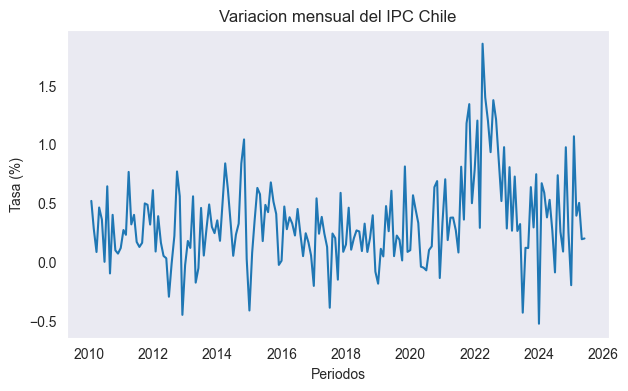

In [35]:
plt.figure(figsize = (7,4))
sns.lineplot(data = ipc_df['ipc'])
plt.xlabel('Periodos')
plt.ylabel('Tasa (%)')
plt.title('Variacion mensual del IPC Chile')
plt.show()

In [36]:
ipc_df.index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30',
               '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31'],
              dtype='datetime64[ns]', length=185, freq='ME')

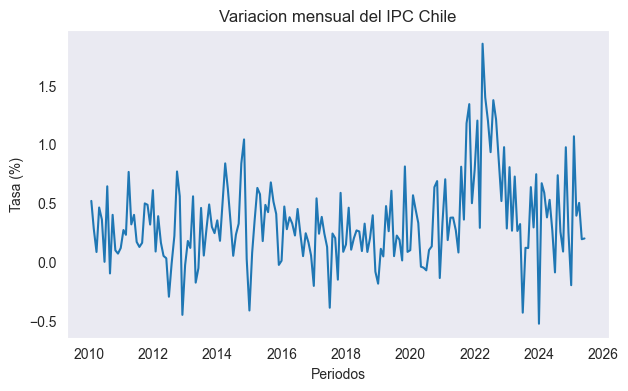

In [37]:
plt.figure(figsize = (7,4))
sns.lineplot(data = ipc_df['ipc'])
plt.xlabel('Periodos')
plt.ylabel('Tasa (%)')
plt.title('Variacion mensual del IPC Chile')
plt.show()

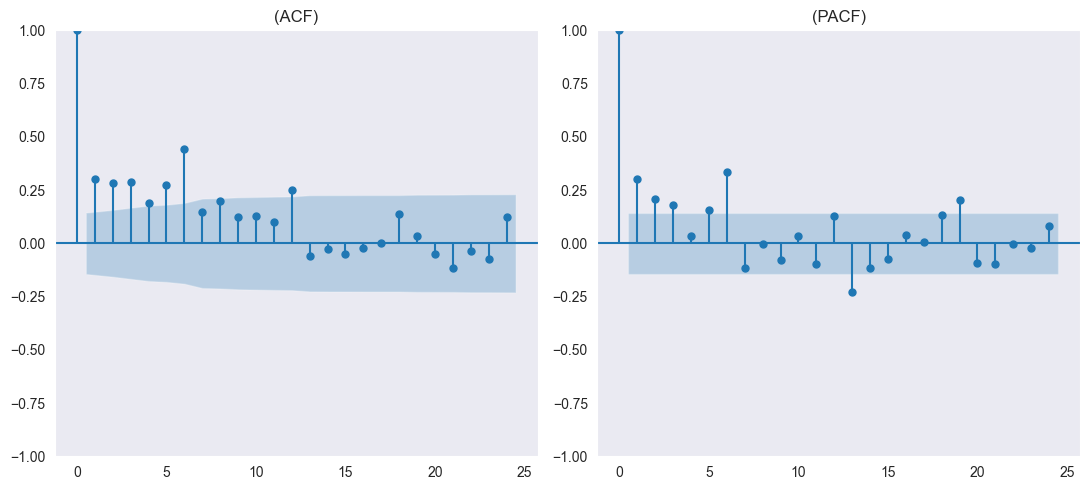

In [38]:
plot_acf_pacf(ipc_df['ipc'], lags = 24)

In [39]:
valida_estacionariedad(ipc_df['ipc'])

Estadistico ADF: -3.2021686042721007
P-Valor: 0.01985949455081656
Numero de lags utilizados: 13
Numero de  Observaciones: 171
Valores Criticos: {'1%': np.float64(-3.4691814633722453), '5%': np.float64(-2.878595143532943), '10%': np.float64(-2.5758625549741803)}
  1%: -3.4691814633722453
  5%: -2.878595143532943
  10%: -2.5758625549741803
La serie es estacionaria: True


{'Estadistico ADF': np.float64(-3.2021686042721007),
 'P-Valor': np.float64(0.01985949455081656),
 'Rezagos': 13,
 'Num. Observaciones': 171,
 'valores criticos': {'1%': np.float64(-3.4691814633722453),
  '5%': np.float64(-2.878595143532943),
  '10%': np.float64(-2.5758625549741803)},
 'Es Estacionaria': np.True_}

<Figure size 1400x1000 with 0 Axes>

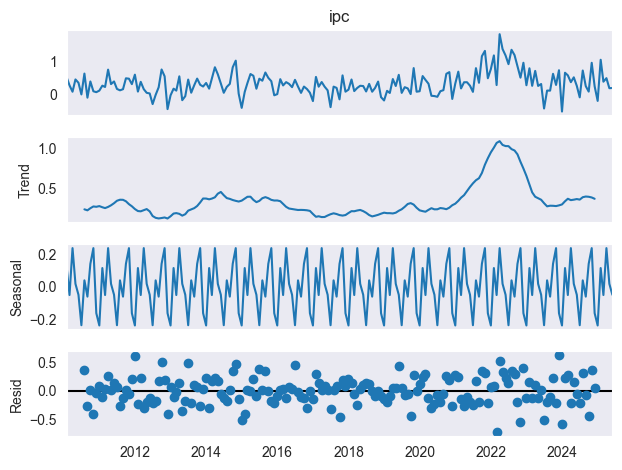

In [40]:
# Descomposición de la serie de tiempo
decomposition = sm.tsa.seasonal_decompose(ipc_df['ipc'], model = 'additive', period = 12)

# Visualizar la descomposición
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()

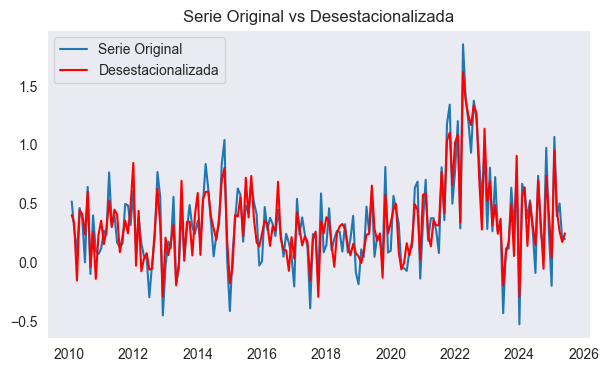

In [41]:
# remover estacionalidad del ipc 
serie_desestacionalizada = ipc_df['ipc'] - decomposition.seasonal

plt.figure(figsize = (7,4))
plt.plot(ipc_df['ipc'], label = 'Serie Original')
plt.plot(serie_desestacionalizada, label = 'Desestacionalizada', color = 'red')
plt.legend()
plt.title('Serie Original vs Desestacionalizada')
plt.show()

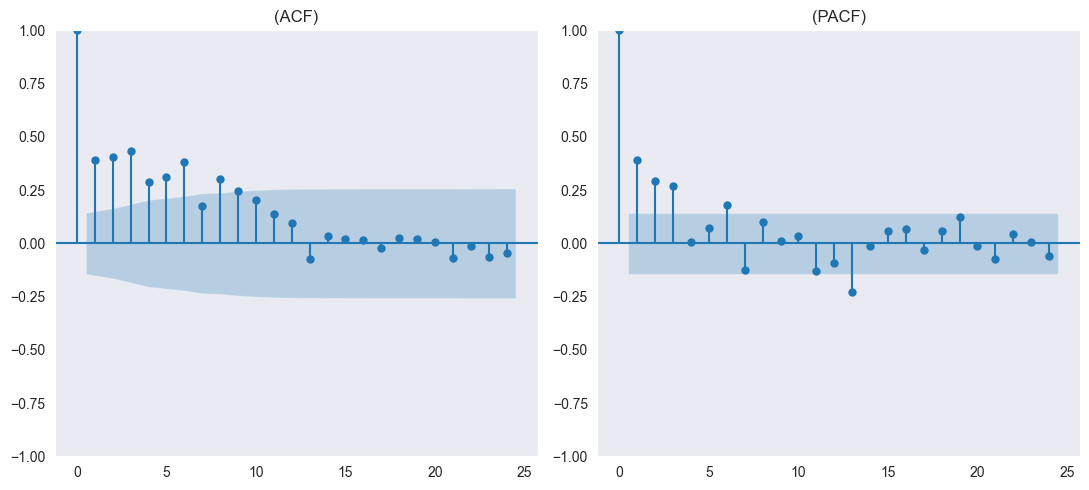

In [42]:
plot_acf_pacf(serie_desestacionalizada, lags = 24)

In [43]:
valida_estacionariedad(serie_desestacionalizada)

Estadistico ADF: -3.4393330628561487
P-Valor: 0.009688895272544582
Numero de lags utilizados: 12
Numero de  Observaciones: 172
Valores Criticos: {'1%': np.float64(-3.468952197801766), '5%': np.float64(-2.878495056473015), '10%': np.float64(-2.57580913601947)}
  1%: -3.468952197801766
  5%: -2.878495056473015
  10%: -2.57580913601947
La serie es estacionaria: True


{'Estadistico ADF': np.float64(-3.4393330628561487),
 'P-Valor': np.float64(0.009688895272544582),
 'Rezagos': 12,
 'Num. Observaciones': 172,
 'valores criticos': {'1%': np.float64(-3.468952197801766),
  '5%': np.float64(-2.878495056473015),
  '10%': np.float64(-2.57580913601947)},
 'Es Estacionaria': np.True_}

Ottra forma de visualizar la estacionalidad de la serie, es mediante el filtro de *Hodrick-Prescott* (o filtro HP). Esta, es una herramienta muy usada en macroeconomía y análisis de series de tiempo para separar la tendencia de largo plazo de los componentes cíclicos de una serie. Fue propuesto por Robert Hodrick y Edward Prescott en 1997.

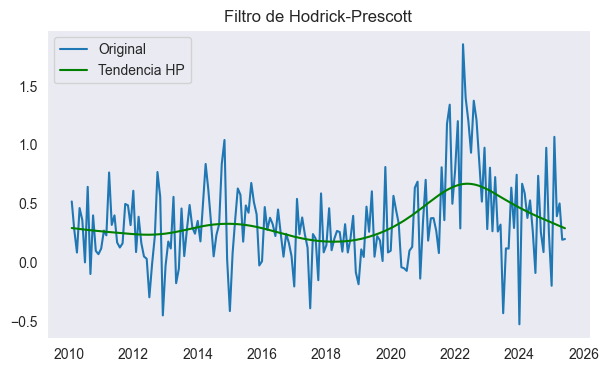

In [44]:
from statsmodels.tsa.filters.hp_filter import hpfilter

ciclo, tendencia = hpfilter(ipc_df['ipc'], lamb = 14400)

# Graficar
plt.figure(figsize = (7,4))
plt.plot(ipc_df['ipc'], label = 'Original')
plt.plot(tendencia, label = 'Tendencia HP', color = 'green')
plt.legend()
plt.title("Filtro de Hodrick-Prescott")
plt.show()

#### Estimacion Modelo ARMA

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# Rango de órdenes a probar
p_values = range(0, 4)  # AR
q_values = range(0, 4)  # MA

# Guardar resultados
resultados = []

for p in p_values:
    for q in q_values:
        if p == 0 and q == 0:
            continue  # no tiene sentido un modelo ARMA(0, 0)
        try:
            modelo = ARIMA(serie_desestacionalizada, order = (p, 0, q), enforce_stationarity = False,
                           enforce_invertibility = False)
            resultado = modelo.fit()
            aic = resultado.aic
            bic = resultado.bic
            hqic = resultado.hqic
            
            resultados.append({
                'p': p,
                'q': q,
                'AIC': aic,
                'BIC': bic,
                'HQIC': hqic
            })
        except:
            continue  # si falla, lo ignora

In [46]:
resultados_df = pd.DataFrame(resultados).sort_values(by = 'AIC').reset_index(drop = True)
print(resultados_df.sort_values('BIC'))

    p  q        AIC         BIC        HQIC
0   3  0  60.028443   76.048477   66.522732
3   1  1  63.420037   76.257982   68.623887
6   2  1  63.873916   79.921347   70.378728
7   1  2  64.177527   80.197560   70.671815
2   3  1  61.968002   81.192042   69.761148
5   1  3  63.804385   82.995368   71.584820
9   2  2  65.858029   85.082069   73.651175
4   3  2  63.789888   86.217935   72.881892
1   3  3  61.150145   86.738122   71.524058
10  2  0  74.404441   87.242386   79.608291
8   2  3  65.229035   87.618514   74.306209
11  0  3  76.427833   92.420319   82.911529
12  1  0  88.547924   98.192732   92.457085
13  0  2  88.652870  101.468896   93.848301
14  0  1  99.893180  109.521639  103.796067


In [47]:
best_order_model = ARIMA(serie_desestacionalizada, order = (3, 0, 0))
best_model_fit = best_order_model.fit()
best_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  185
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -25.795
Date:                Thu, 26 Jun 2025   AIC                             61.590
Time:                        22:48:28   BIC                             77.692
Sample:                    01-31-2010   HQIC                            68.116
                         - 05-31-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3327      0.069      4.832      0.000       0.198       0.468
ar.L1          0.1950      0.060      3.250      0.001       0.077       0.313
ar.L2          0.2176      0.062      3.501      0.000       0.096       0.339
ar.L3          0.2696      0.064      4.245      0.000       0.145       0.394
sigma2         0.0771      0.008      9.861      0.000       0.062       0.092
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.98   Prob(JB):                         0.65
Heteroskedasticity (H):               1.48   Skew:                             0.13
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Diagnóstico del modelo

##### Estacionariedad

In [48]:
# almaceno resiudos del modelo arma(3,0)
residuos = resultado.resid 

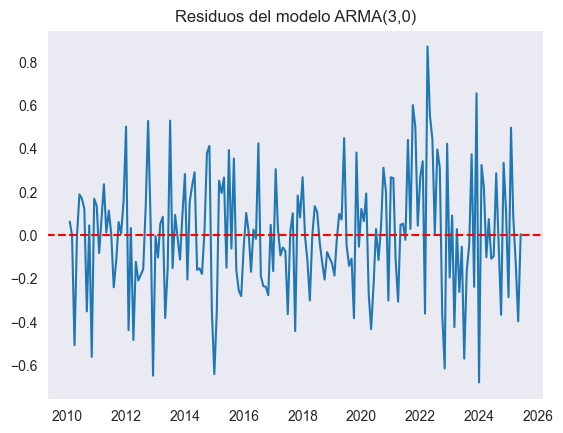

In [49]:
plt.plot(residuos)
plt.title("Residuos del modelo ARMA(3,0)")
plt.axhline(0, color = 'red', linestyle = '--')
plt.show()

In [50]:
valida_estacionariedad(residuos)

Estadistico ADF: -13.47915919184031
P-Valor: 3.267001651145942e-25
Numero de lags utilizados: 0
Numero de  Observaciones: 184
Valores Criticos: {'1%': np.float64(-3.466398230774071), '5%': np.float64(-2.8773796387256514), '10%': np.float64(-2.575213838610586)}
  1%: -3.466398230774071
  5%: -2.8773796387256514
  10%: -2.575213838610586
La serie es estacionaria: True


{'Estadistico ADF': np.float64(-13.47915919184031),
 'P-Valor': np.float64(3.267001651145942e-25),
 'Rezagos': 0,
 'Num. Observaciones': 184,
 'valores criticos': {'1%': np.float64(-3.466398230774071),
  '5%': np.float64(-2.8773796387256514),
  '10%': np.float64(-2.575213838610586)},
 'Es Estacionaria': np.True_}

##### Autocorrelación

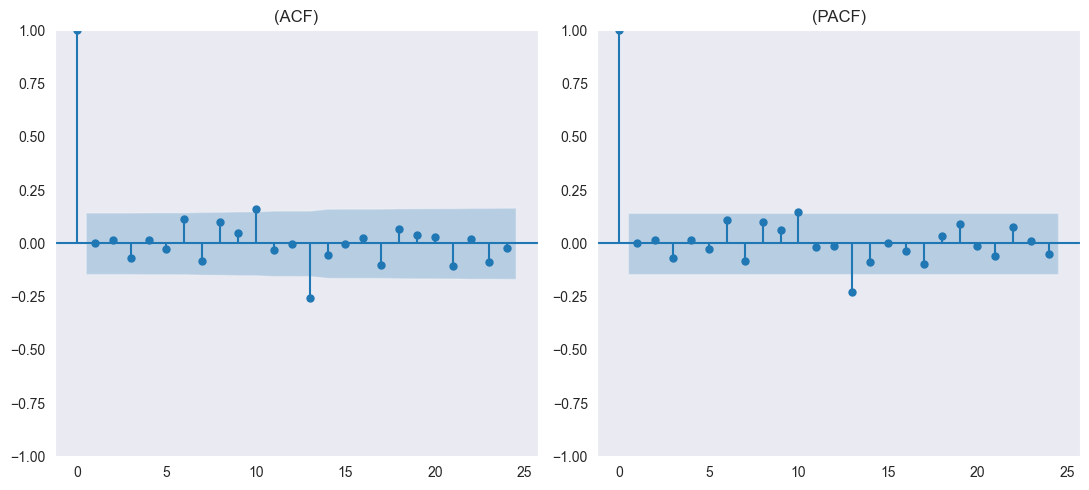

In [51]:
plot_acf_pacf(residuos, lags = 24)

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljungbox_result = acorr_ljungbox(residuos, lags=[10], return_df = True)
print(ljungbox_result)

     lb_stat  lb_pvalue
10  12.68816   0.241633


##### Normalidad

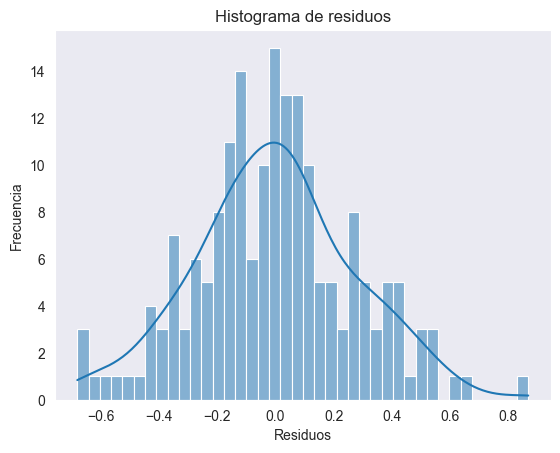

In [53]:
sns.histplot(residuos, bins = 40, kde = True)
plt.title("Histograma de residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

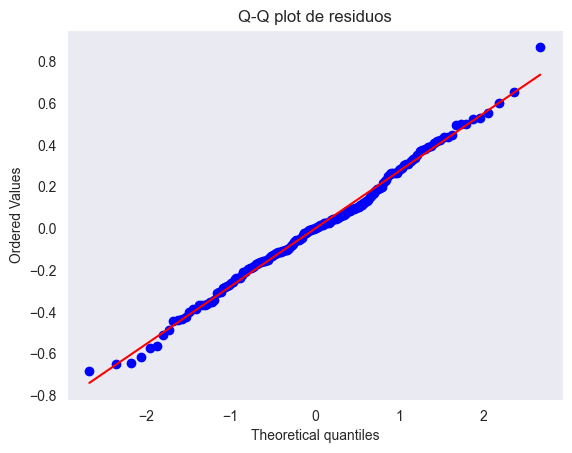

In [54]:
import scipy.stats as stats
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de residuos")
plt.show()

In [55]:
from scipy.stats import jarque_bera
jb_stat, jb_p = jarque_bera(residuos)
print(f'Estadístico JB: {jb_stat:.2f}, p-valor: {jb_p:.4f}')

Estadístico JB: 0.47, p-valor: 0.7891


#### Forecast

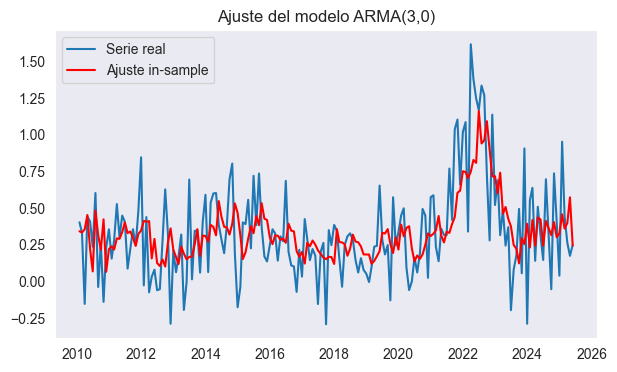

In [56]:
in_sample_pred = resultado.fittedvalues

plt.figure(figsize = (7, 4))
plt.plot(serie_desestacionalizada, label = 'Serie real')
plt.plot(in_sample_pred, label='Ajuste in-sample', color = 'red')
plt.title("Ajuste del modelo ARMA(3,0)")
plt.legend()
plt.show()

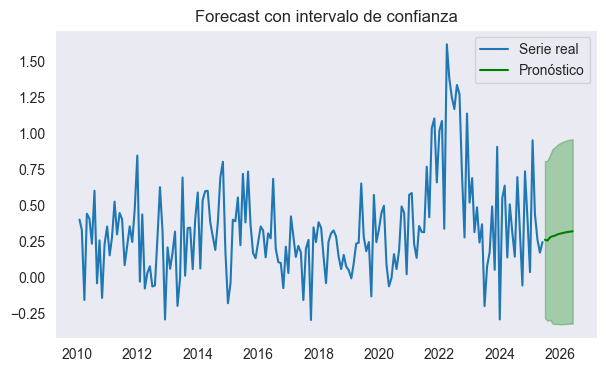

In [57]:
pred = best_model_fit.get_forecast(steps = 12)
media = pred.predicted_mean
conf_int = pred.conf_int()

# Visualizar con intervalos
plt.figure(figsize=(7, 4))
plt.plot(serie_desestacionalizada, label='Serie real')
plt.plot(media, label='Pronóstico', color='green')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='green', alpha=0.3)
plt.title('Forecast con intervalo de confianza')
plt.legend()
plt.show()

¿Por qué tiene ese comportamiento el forecast?

En muchos modelos ARIMA (especialmente si son ARIMA estacionarios o ARIMA sin tendencia determinista), el pronóstico a largo plazo tiende hacia la media de la serie (que puede ser cero si la serie fue centrada).

\begin{equation*}
\lim_{h \to \infty} \mathbb{E}[y_{t+h}] = \mu, \quad \textsf{si } y_t \textsf{ es estacionaria}
\end{equation*}

In [58]:
# Crear DataFrame del pronóstico
forecast_df = pd.DataFrame({
    'Fecha': media.index,
    'Pronóstico': media.values,
    'IC Inferior': conf_int.iloc[:, 0].values,
    'IC Superior': conf_int.iloc[:, 1].values
})

# Establecer la columna 'Fecha' como índice (opcional)
forecast_df.set_index('Fecha', inplace = True)

# Mostrar
forecast_df

,Pronóstico,IC Inferior,IC Superior
Fecha,,,
2025-06-30,0.262892,-0.281478,0.807263
2025-07-31,0.257758,-0.296868,0.812384
2025-08-31,0.279950,-0.291868,0.851767
2025-09-30,0.287280,-0.317516,0.892076
2025-10-31,0.292154,-0.320421,0.904730
2025-11-30,0.300682,-0.319899,0.921262
2025-12-31,0.305382,-0.322226,0.932989
2026-01-31,0.309468,-0.321613,0.940548
2026-02-28,0.313586,-0.320346,0.947518
